In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [2]:
#LOADING THE DATASETS 
null_vals = [0,0.00,0.000,'na','Nan']
df1 = pd.read_csv('Part1 - Normal.csv', na_values=null_vals) 
print("\n",df1.isnull().sum())
df2 = pd.read_csv('Part1 - Type_H.csv', na_values=null_vals)
print("\n",df2.isnull().sum())
df3 = pd.read_csv('Part1 - Type_S.csv', na_values=null_vals)
print("\n",df3.isnull().sum())

print("\n There are no null values in the given dataset")


 P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

 P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

 P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

 There are no null values in the given dataset


In [3]:
## ANALYSING THE DATA

print("\n This is the shape of Normal Class ", df1.shape, "The size of DF1 :",df1.size)
print("\n This is the shape of Type_H Class ", df2.shape , "The size of DF2 :",df2.size)
print("\n This is the shape of Type_S Class ", df3.shape, "The size of DF3 :",df3.size)


 This is the shape of Normal Class  (100, 7) The size of DF1 : 700

 This is the shape of Type_H Class  (60, 7) The size of DF2 : 420

 This is the shape of Type_S Class  (150, 7) The size of DF3 : 1050


In [5]:
print(df1.Class.value_counts())
print(df2.Class.value_counts())
print(df3.Class.value_counts())

Normal    73
Nrmal     27
Name: Class, dtype: int64
Type_H    37
type_h    23
Name: Class, dtype: int64
Type_S    133
tp_s       17
Name: Class, dtype: int64


The columns of the data are same, So the data can be merged one below the other

In [4]:
df1 = df1.append(df2,ignore_index=True)
df1 = df1.append(df3,ignore_index=True)
df1

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [5]:
df1.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

<p>There is no null data in the above data set</p>


In [6]:
print("This is the shape of data after combining ", df1.shape)

This is the shape of data after combining  (310, 7)


In [7]:
df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

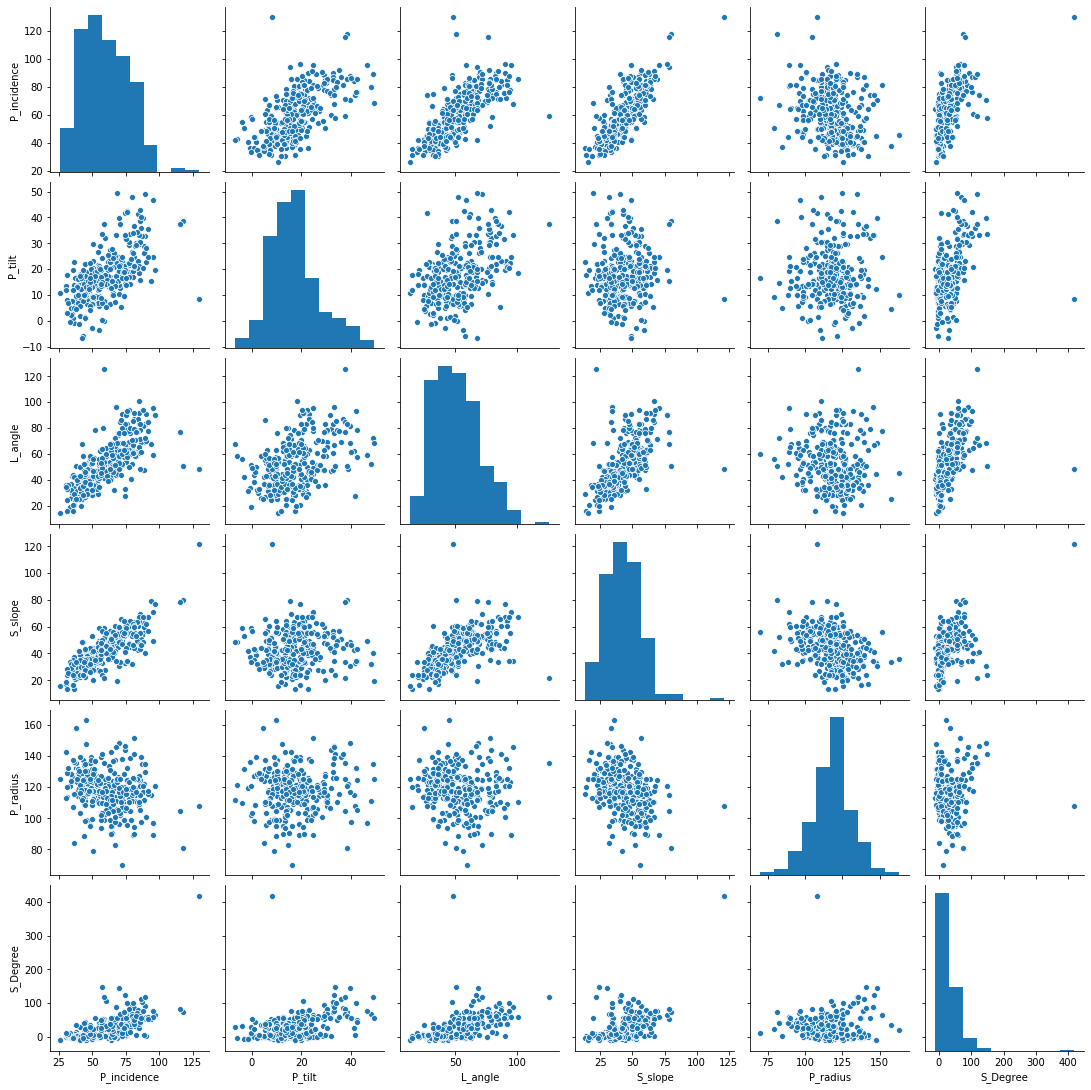

In [8]:
sns.pairplot(df1)


In [9]:
print(df1.Class.value_counts())

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64


In [396]:
# to convert the datatype of class from object to int by giving Normal = 1 , Type s =2, Type h=3

df1['Class'] = df1['Class'].replace({'Normal':1,'Type_S': 2,'Type_H':3,'Nrmal':1,'type_h':3,'tp_s':2})


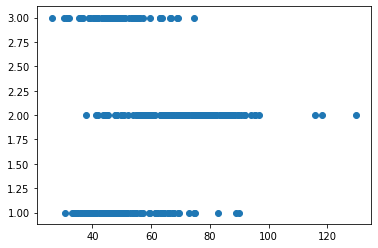

In [397]:
plt.scatter(df1['P_incidence'],df1['Class'])

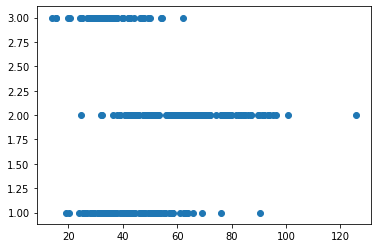

In [398]:
plt.scatter(df1['L_angle'],df1['Class'])

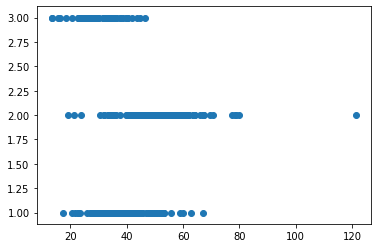

In [399]:
plt.scatter(df1['S_slope'],df1['Class'])

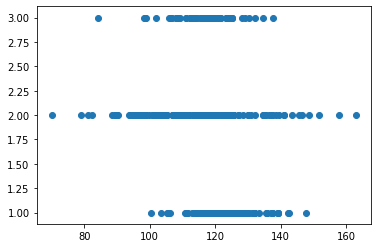

In [400]:
plt.scatter(df1['P_radius'],df1['Class'])

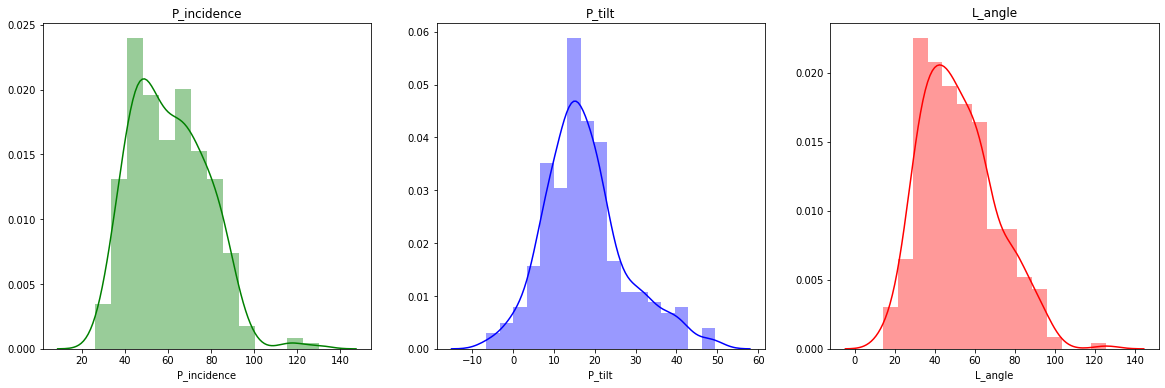

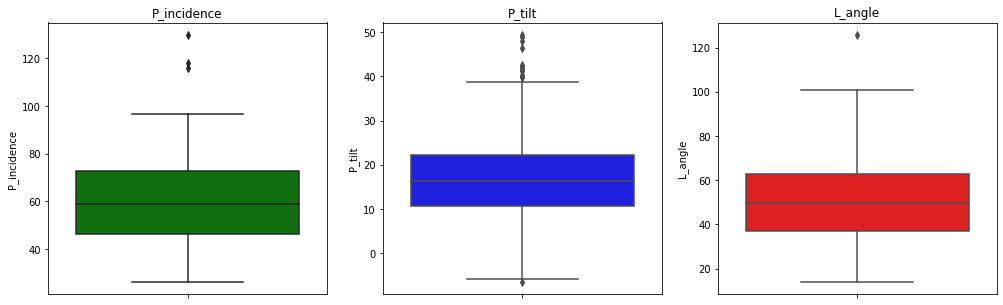

In [433]:
# subplot 1
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.distplot(df1['P_incidence'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('P_tilt')
sns.distplot(df1['P_tilt'],color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('L_angle')
sns.distplot(df1['L_angle'],color='red')


plt.figure(figsize=(17,5))

# boxplot 1
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.boxplot(df1['P_incidence'],orient='vertical',color='green')

# boxplot 2
plt.subplot(1, 3, 2)
plt.title('P_tilt')
sns.boxplot(df1['P_tilt'],orient='vertical',color='blue')

# boxplot 3
plt.subplot(1, 3, 3)
plt.title('L_angle')
sns.boxplot(df1['L_angle'],orient='vertical',color='red')


plt.show()

# From the above analysis we can say that 

1 P_tilt is normally distributed with more outliers
2 L_angle is left skewed with very less outliers
3 P_incidence is a bit normal with moderate number of outliers 

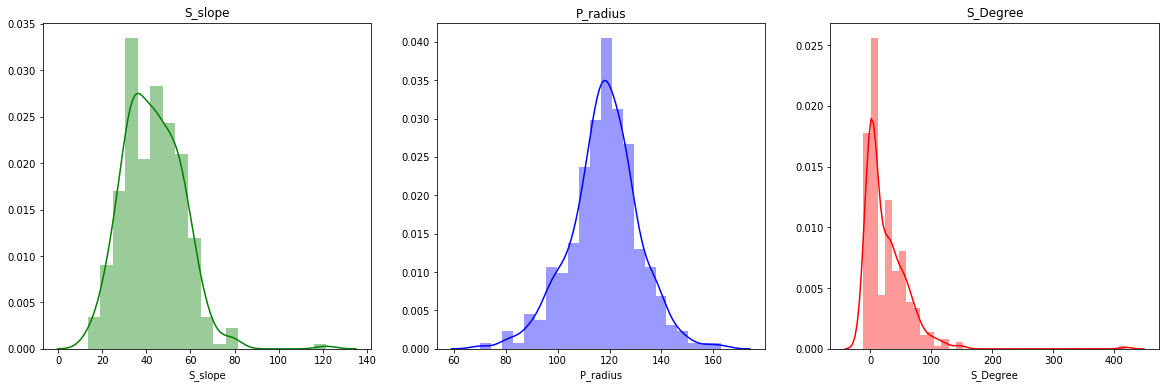

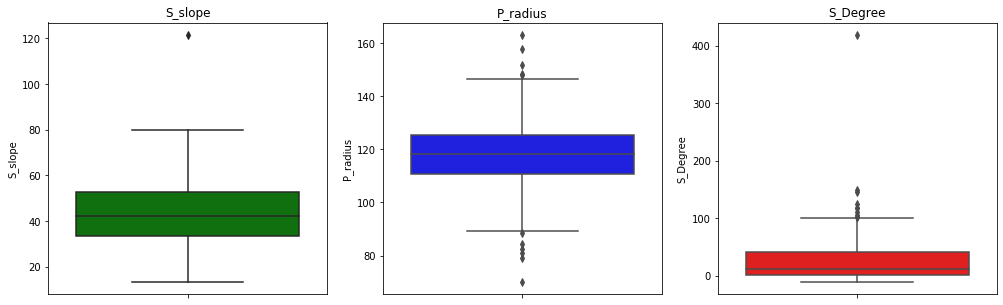

In [434]:
# subplot 1
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('S_slope')
sns.distplot(df1['S_slope'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('P_radius')
sns.distplot(df1['P_radius'],color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('S_Degree')
sns.distplot(df1['S_Degree'],color='red')


plt.figure(figsize=(17,5))

# boxplot 1
plt.subplot(1, 3, 1)
plt.title('S_slope')
sns.boxplot(df1['S_slope'],orient='vertical',color='green')

# boxplot 2
plt.subplot(1, 3, 2)
plt.title('P_radius')
sns.boxplot(df1['P_radius'],orient='vertical',color='blue')

# boxplot 3
plt.subplot(1, 3, 3)
plt.title('S_Degree')
sns.boxplot(df1['S_Degree'],orient='vertical',color='red')


plt.show()

# From the above analysis we can say that 

1 P_radius is normally distributed with more outliers
2 S_degree is highly left skewed with more  outliers
3 S_slope is a bit normal withless number of outliers 

In [402]:
#Getting the insights of data

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Class,310.0,1.870968,0.707881,1.000000,1.000000,2.000000,2.000000,3.000000


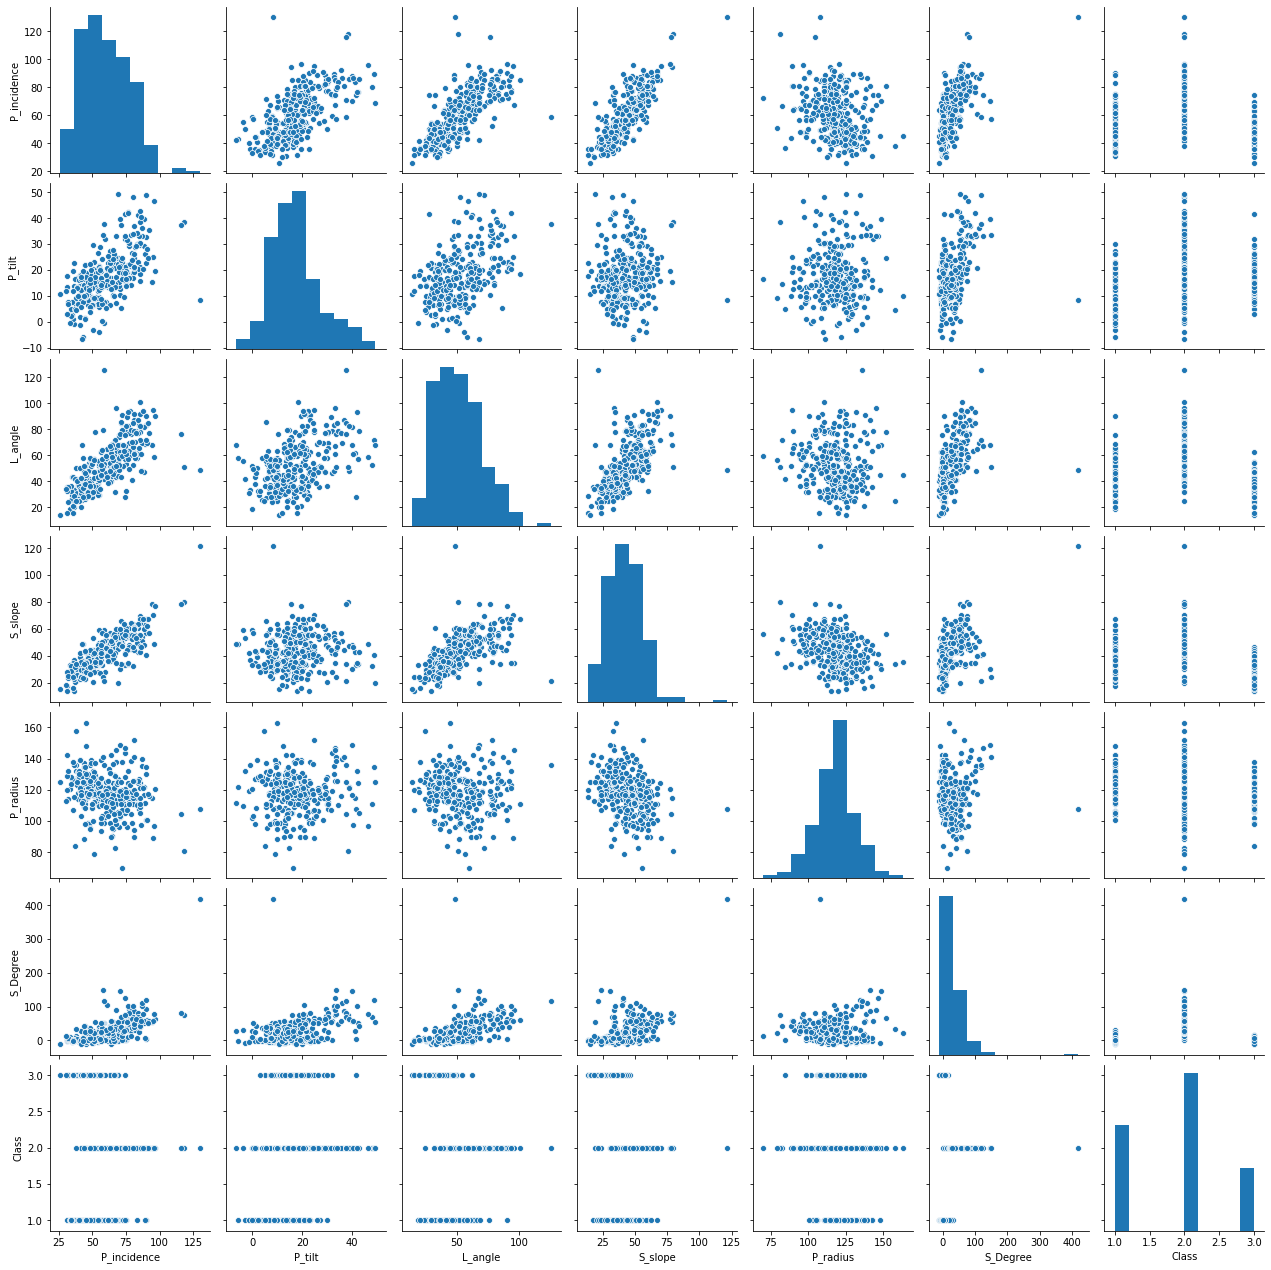

In [403]:

sns.pairplot(df1) #To check the behaviour of the data

In [404]:
from sklearn.cluster import KMeans


In [405]:
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)

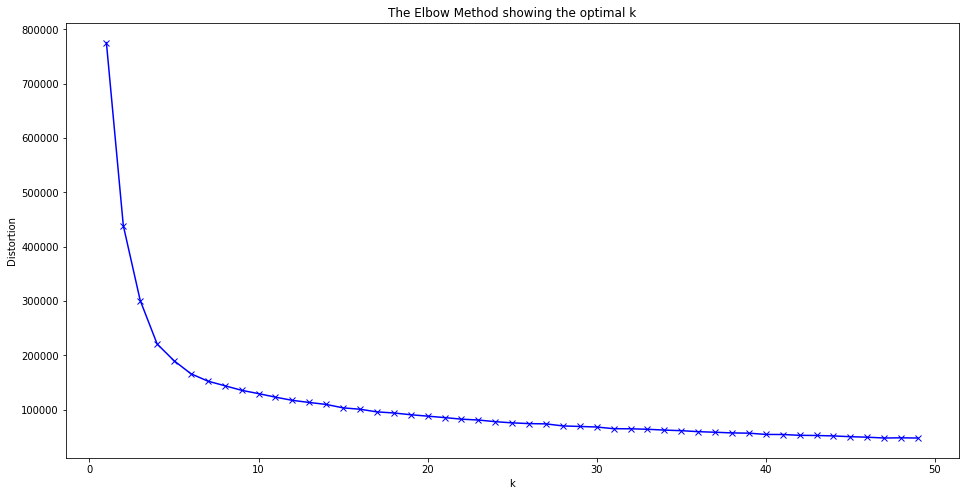

In [406]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [407]:
x = df1.drop(labels= "Class" , axis = 1)
y = df1['Class']
x.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [408]:
x_norm = x.apply(zscore)
x_norm.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,8.702716e-17,2.326096e-16,1.980495e-16,5.121351e-17,-6.274551e-16,-8.156558e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [409]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.30, random_state=1)

In [424]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'distance' )

In [425]:
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='distance')

In [426]:
predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.8064516129032258

In [427]:
# NNH.score(x_train, y_train)

Confusion Matrix


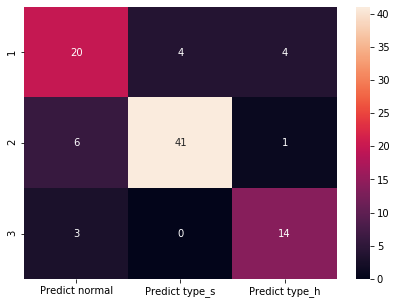

In [428]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
labels = [1,2,3]
print("Confusion Matrix")

cm=metrics.confusion_matrix(y_test, predicted_labels, labels=labels)

df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in ["Predict normal","Predict type_s","Predict type_h"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [432]:
#From the above confusion matrix we can get the parameters of recall , precision, f1 score
# For a 3x3 confusion matrx 
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels, labels=labels))

              precision    recall  f1-score   support

           1       0.69      0.71      0.70        28
           2       0.91      0.85      0.88        48
           3       0.74      0.82      0.78        17

    accuracy                           0.81        93
   macro avg       0.78      0.80      0.79        93
weighted avg       0.81      0.81      0.81        93



From the above metrics we can conclude that Precision and recall are high for the Type_S class which means that the Type_s patients are more affected by the features of data. 


Submitted by - Akshat Dave